In [1]:
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import math

In [2]:
X = [0, 0.5, 1, 0.25, 0.5, 0.75, 0.5]
Y = [0, 0, 0, np.sqrt(3)/4, np.sqrt(3)/6, np.sqrt(3)/4, np.sqrt(3)/2]
array = np.array(list(zip(X,Y)))
array

array([[0.        , 0.        ],
       [0.5       , 0.        ],
       [1.        , 0.        ],
       [0.25      , 0.4330127 ],
       [0.5       , 0.28867513],
       [0.75      , 0.4330127 ],
       [0.5       , 0.8660254 ]])

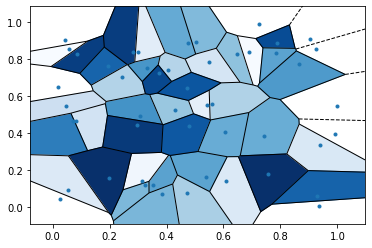

In [3]:
# generate data/speed values
points = np.random.uniform(size=[50, 2])
speed = np.random.uniform(low=0.0, high=5.0, size=50)

# generate Voronoi tessellation
vor = Voronoi(points)

# find min/max values for normalization
minima = min(speed)
maxima = max(speed)

# normalize chosen colormap
norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues_r)

# plot Voronoi diagram, and fill finite regions with color mapped from speed value
voronoi_plot_2d(vor, show_points=True, show_vertices=False, s=1)
for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r]))
plt.show()

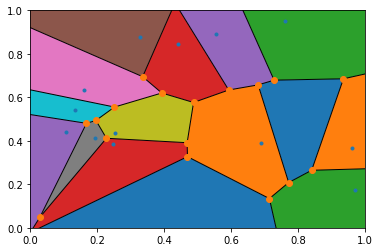

In [4]:
#I have a much simpler solution to this problem, that is to add 4 distant dummy points to your point list before calling the Voronoi algorithm.

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# make up data points
points = np.random.rand(15,2)

# add 4 distant dummy points
points = np.append(points, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)

# compute Voronoi tesselation
vor = Voronoi(points)

# plot
voronoi_plot_2d(vor)

# colorize
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon))

# fix the range of axes
plt.xlim([0,1]), plt.ylim([0,1])

plt.show()


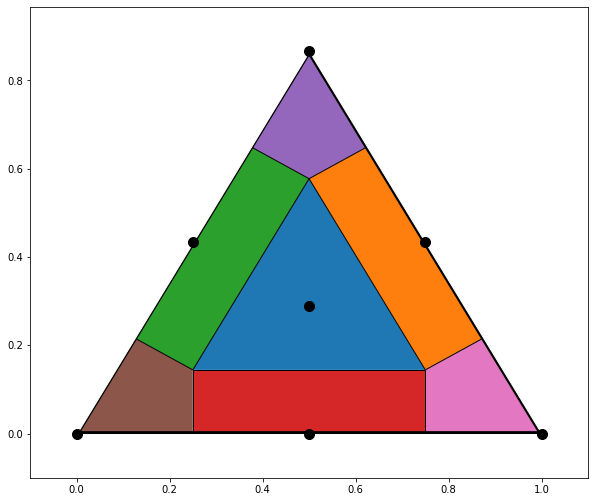

In [5]:
array = np.append(array, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)
plt.rcParams["figure.figsize"] = (10, 10*np.sqrt(3)/2)
vor = Voronoi(array)
fig = voronoi_plot_2d(vor, show_points=False, show_vertices=False, point_size=12)
# colorize
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon))
plt.xlim([-0.1, 1.1]), plt.ylim([-0.1, np.sqrt(3)/2 + 0.1])
plt.plot([0, 0.5, 1, 0], [0, math.sqrt(3)/2, 0, 0],zorder=1, color='black', alpha=1,  linewidth=5)
plt.fill_between(x = [0, 0.5], y1 = [0, math.sqrt(3)/2], y2= [1, 1], color = 'white', zorder = 2)
plt.fill_between(x = [0.5, 1], y1 = [math.sqrt(3)/2, 0], y2= [1, 1], color = 'white', zorder = 2)
plt.fill_between(x = [0, 1], y1 = [0, 0], y2= [-1, -1], color = 'white', zorder = 2)
plt.fill_between(x = [1, 1.1], y1 = [-0.1, -0.1], y2= [1.1, 1.1], color = 'white', zorder = 2)
plt.fill_between(x = [-0.1, 0], y1 = [-0.1, -0.1], y2= [1.1, 1.1], color = 'white', zorder = 2)

plt.scatter(x = [0, 0.5, 1, 0.25, 0.5, 0.75, 0.5],y = [0, 0, 0, np.sqrt(3)/4, np.sqrt(3)/6, np.sqrt(3)/4, np.sqrt(3)/2], color = 'black', s = 100, zorder =3)
fig.savefig('voronoi.png')
plt.show()


In [6]:
vertices = vor.vertices
# ordering vertices
x_plus = np.array([1, 0]) # unit vector in i direction to measure angles from
theta = np.zeros(len(vertices))
for v_i in range(len(vertices)):
    ri = vertices[v_i]
    if ri[1]-self.r[1] >= 0: # angle from 0 to pi
        cosine = np.dot(ri-self.r, x_plus)/np.linalg.norm(ri-self.r)
        theta[v_i] = np.arccos(cosine)
    else: # angle from pi to 2pi
        cosine = np.dot(ri-self.r, x_plus)/np.linalg.norm(ri-self.r)
        theta[v_i] = 2*np.pi - np.arccos(cosine)

order = np.argsort(theta) # returns array of indices that give sorted order of theta
vertices_ordered = np.zeros(vertices.shape)
for o_i in range(len(order)):
    vertices_ordered[o_i] = vertices[order[o_i]]

NameError: name 'self' is not defined

In [ ]:
# compute the area of cell using ordered vertices (shoelace formula)
vertices_ordered = vor.vertices
partial_sum = 0
for i in range(len(vertices_ordered)-1):
    partial_sum += vertices_ordered[i,0]*vertices_ordered[i+1,1] - vertices_ordered[i+1,0]*vertices_ordered[i,1]
    partial_sum += vertices_ordered[-1,0]*vertices_ordered[0,1] - vertices_ordered[0,0]*vertices_ordered[-1,1]
area = 0.5 * abs(partial_sum)
print(area)


499856.4561944336
